In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.1


v3.0


v2.1


In [2]:
#create parameters
params = []
ϕas = fill(0.5,8)
ϕps = collect(0.025:0.025:0.2)
DT, v0, DR, N, Δx, Lx, Ly, δt, δ = (1.0, 7.5, 1.0, 100, 0.02, 20.0, 0.5, 1e-5, 0.01);
T, save_interval, param_name = (4000.0, 100.0, "fig_2")
map(ϕas, ϕps) do ϕa, ϕp
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(params,param)
end

8-element Vector{Vector{Any}}:
 [Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "fig_2", "save_on" => true, "DT" => 1.0, "Lx" => 20.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "fig_2", "save_on" => true, "DT" => 1.0, "Lx" => 20.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "fig_2", "save_on" => true, "DT" => 1.0, "Lx" => 20.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "fig_2", "save_on" => true, "DT" => 1.0, "Lx" => 20.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0.01, "δt" => 1.0e-5, "name" => "fig_2", "save_on" => true, "DT" => 1.0, "Lx" => 20.0, "N" => 100, "DR" => 1.0…), Dict{String, Any}("T" => 4000.0, "save_interval" => 100.0, "δ" => 0

In [44]:
# parameters
Pe = 7.5;
initial_Δ = 1e-5;
max_iter = 60;
tol = 1e-12;
atol = 1e-14;
rho_max = (1-1e-20);
#quick solve
Pe = 7.5;
γ_limit = find_gamma_limit(;Pe = Pe, initial_Δ = initial_Δ, γ_max = 100.)
#set Γ range
Γ = collect(1:0.01:γ_limit)
for i in 4:1:10
    γ1 = round(γ_limit, RoundDown; digits= i-2)
    γ2 = round(γ_limit, RoundDown; digits= i)
    Γ = append!(Γ,collect(γ1:(10.0^(-i)):γ2))
end
# println(Γ)
#solve over Γ
Pes = []
    γs = []
    ϕ1s = []
    ϕ2s = []
    approx = []
    errors = []
for γ in Γ
    find_sol = false
    try 
        find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, rho_max = rho_max, initial_Δ = initial_Δ, max_iter = max_iter, tol = tol, atol = atol)
        if find_sol
            push!(ϕ1s,lower_limits[1])
            push!(ϕ2s,upper_limits[1])
            push!(γs, γ)
        end
    catch
            println("no solution Pe=$(Pe), γ=$(γ)")
            push!(errors,γ)
    end
end
average_ϕs = (ϕ1s+ ϕ2s)./2
χs = chis_converter(γs, average_ϕs)

#save results
using JLD2
    data = Dict{String,Any}()
    @pack! data = Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs
    filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
    wsave(filename,data)


no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776


no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in g0
no solution Pe=7.5, γ=2.2104681138915776
no turn in

27-element Vector{Any}:
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 ⋮
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776
 2.2104681138915776

In [10]:
#load binodal
    Pe = v0 
    filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
    data = wload(filename)
    @unpack Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs = data

#plot binodal
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")
    ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")
    #ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

    rc("text", usetex=true)
    #ax.yaxis.set_ticks(ytic)
    #axlim = [0.4, 0.45, 0, 0.1]
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    ax.yaxis.set_tick_params(labelsize=15)
    
    #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
    ax.set_xlabel(L"\phi^a",fontsize=20)
    ax.set_ylabel(L"\phi^p", fontsize=20)
    # ax.legend(loc = "upper right", fontsize=20)
    # ax.set_aspect(0.25*Δρ/ΔPe)
    # title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
    # ax.set_title(title,fontsize=20)
    fig.tight_layout()
#display(fig)

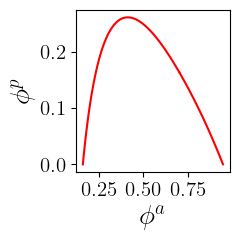

In [4]:
display(fig)

In [11]:
ϕas = []
ϕps = []
for param in params
    local pde_ts, f_saves, f, t, ϕal, ϕag, ϕpl, ϕpg
    #load saves
    pde_ts, f_saves = load_compress_pde(param)
    f = f_saves[end]
    t = pde_ts[end]

    if t > 500
        rho = f[:,1] + f[:,2] + f[:,3]
        min_pt = argmax(rho)
        max_pt = argmin(rho)
        if min_pt<max_pt
            global x 
            x = min_pt:1:max_pt
        else
            global x 
            x = max_pt:1:min_pt
        end

        ax.plot(f[x,1] + f[x,2], f[x,3], color = "black",linestyle = "--", label = "_gas phase")
            
        ϕal = maximum( f[x,1] + f[x,2])
        ϕag = minimum( f[x,1] + f[x,2])
        ϕpl = minimum( f[x,3] )
        ϕpg = maximum( f[x,3] )
    
        push!(ϕas, ϕal)
        push!(ϕas, ϕag)
        push!(ϕps, ϕpl)
        push!(ϕps, ϕpg)
    end
end

ax.scatter(ϕas, ϕps; color = "black", marker = "^", edgecolor = "black")

fast load
fast load
fast load
fast load
fast load
fast load
fast load
fast load


PyObject <matplotlib.collections.PathCollection object at 0x7f9569dd70a0>

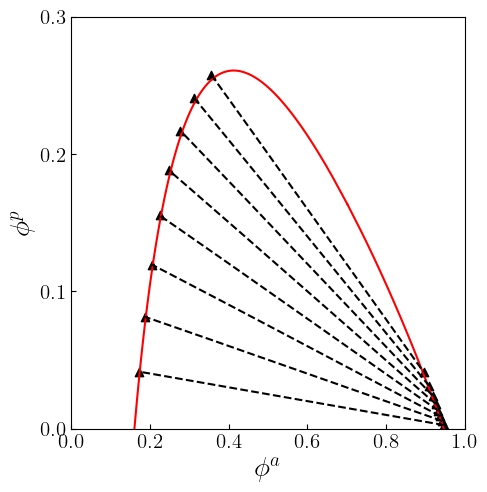

In [12]:
axlim = [0, 1, 0, 0.275]
ax.axis(axlim)
ax.xaxis.set_ticks(0.:0.2:1.0)
ax.yaxis.set_ticks(0.:0.1:0.3)
ax.tick_params(labelbottom = true, direction = "in")
display(fig)
fig_name = "bin_pde_plot"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/Pe=$(Pe).pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)